In [1]:
from covariant_integrator_library import *
from bunch_inits import *
from plotting_variables import *

font_size = 16
# Update the rcParams dictionary to set the font size globally
plt.rcParams.update({'font.size': font_size})

E_MeV =  5008189.981179729
Gamma =  5337.025854970387
E_rest =  938.385948501337
E_MeV =  -5008170.348124264
Gamma =  25.965541791053248
E_rest =  193020.75925874696
2.1e-08
184.73380822553895
driver fractional energy shift [0.44639767]
rider fractional energy shift [0.99396766]


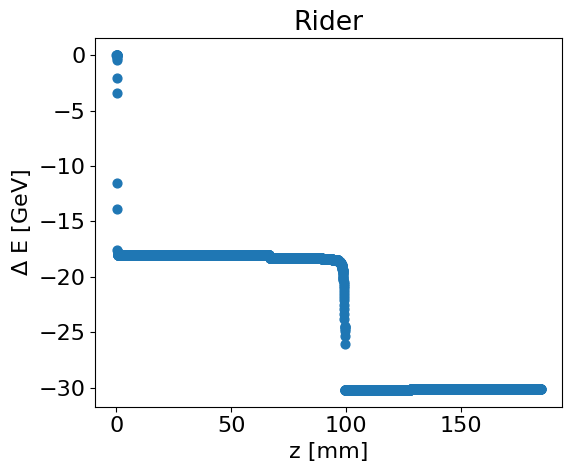

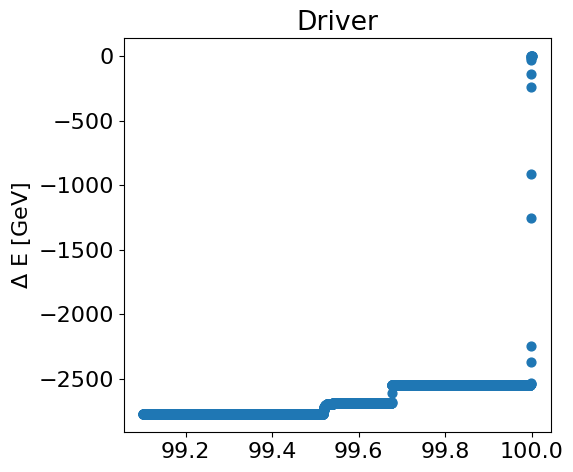

E_MeV =  4845838.508886548
Gamma =  5164.014452138643
E_rest =  938.385948501337
E_MeV =  -4845832.468923727
Gamma =  25.125148178081073
E_rest =  193020.75925874696
2.2000000000000002e-08


KeyboardInterrupt: 

In [9]:
c_ms = 299792458

transv_dist = 1e-4

m_particle_rider = 1.007319468  #proton -amu
m_particle_driver = 207.2 #lead, amu
#m_particle = 0.0005485   #electron -amu
#m_particle_driver = 315 #gold hexafloride, amu

stripped_ions_rider = 1.
stripped_ions_driver = 54.
charge_sign_rider= 1.
charge_sign_driver = 1.
#Pz_list = np.linspace(9.584300885e5,9.584295e4,30)
Pz_list = np.linspace(1.3e6,9.584295e4,30)
min_dE_MeVs_rider = []
min_dE_MeVs_driver = []
fracs_E_rider = []
fracs_E_driver = []
        
for i in range(0,len(Pz_list)):
#for i in range(0,1):
        #Pz_list = np.linspace(9.584300885e5,9.584295e4,30)
        Pz_list = np.linspace(1.6e6,9.584295e4,30)
        
        starting_Pz_rider = Pz_list[i]   #3.25E5 corresponds to 1 TeV
        
        starting_Pz_driver = -starting_Pz_rider/m_particle_driver*m_particle_rider  #actually velocity-like, mass factored later
        transv_mom_rider = 1e-6   #1e-2 is roughly 10keV scale
        transv_mom_driver = transv_mom_rider#*207 # lazy adding lead mass
        starting_distance_rider = 1e-3
        starting_distance_driver = 100.

        sim_type = 2    # type 2 used here, it is for bunch--bunch simulations
        pcount_rider = 1    #bunch counts
        pcount_driver = 1



        init_rider, E_MeV_rest_rider = init_bunch(starting_distance_rider,transv_mom_rider,starting_Pz_rider,stripped_ions_rider,m_particle_rider,transv_dist,pcount_rider,charge_sign_rider)

        init_driver, E_MeV_rest_driver = init_bunch(starting_distance_driver,transv_mom_driver,starting_Pz_driver,stripped_ions_driver,m_particle_driver,-transv_dist,pcount_driver,charge_sign_driver)


        #### parameters not used in this test, but required to run integrator
        bunch_dist = 1E5   #bunch--bunch distance at which the driver bunch has maximum charge (gaussian mean)
        cav_spacing = 1E5  #distance to the subsequent driver bunch
        aperture = 1E5 #this parameter reused for bunch-driven gaussian sigma
        z_cutoff = 0
        wall_pos= 1E5


        #coarse initialization
        # static_steps = 1#set init_steps equal to tot_steps to test static integrator only
        # ret_steps = 25
        # step_size = 2e-6

        #interaction zone
        static_steps = 1
        ret_steps = 5500
        #step_size = 1e-7 #+ 2.3e-6 / ( (i+1) / (25) )
        step_size = 2e-8 + (i+1)*1e-9 
        print(step_size)
        
        retarded_traj,retarded_drv_traj = retarded_integrator3(static_steps,ret_steps,step_size,wall_pos,aperture,sim_type,init_rider,init_driver,bunch_dist,cav_spacing,z_cutoff)#just use retarded_intergrator2 for retarded calcs
        #retarded_traj,retarded_drv_traj = retarded_integrator3(static_steps,ret_steps,step_size,wall_pos,aperture,sim_type,retarded_traj_pre[-1],retarded_drv_traj_pre[-1],bunch_dist,cav_spacing,z_cutoff)#just use retarded_intergrator2 for retarded calcs
        #retarded_traj,retarded_drv_traj = retarded_traj2,retarded_drv_traj2

        delta_e, delta_e_drv, tot_e, tot_e_drv, delta_e_keV, delta_e_MeV, tot_e_GeV, delta_e_keV_drv, delta_e_MeV_drv, tot_e_GeV_drv, zs, xs, zs_drv, xs_drv, bzs, bxs, bys, bdotxs, bdotys, bdotzs, Pzs, Pxs, Pys, Pts, gammas, tees, bzs_drv, bxs_drv, bys_drv, bdotxs_drv, bdotys_drv, bdotzs_drv, Pzs_drv, Pxs_drv, Pys_drv, Pts_drv, gammas_drv, tees_drv, qs_drv, gam_fixed, bdotzs_seconds, q_statC_squared, q_kg_m3_sneg2, Pows_z_rider_watts = calculate_plotting_variables(retarded_traj,
        retarded_drv_traj, init_rider, init_driver, static_steps, ret_steps, E_MeV_rest_rider, E_MeV_rest_driver, c_ms)
        min_dE_MeVs_rider = np.append(min_dE_MeVs_rider,np.min(delta_e_MeV))
        min_dE_MeVs_driver = np.append(min_dE_MeVs_driver,np.min(delta_e_MeV_drv))
        # max_dE_MeVs_rider = np.append(max_dE_MeVs_rider,np.max(np.abs(delta_e_MeV)))
        # max_dE_MeVs_driver = np.append(max_dE_MeVs_driver,np.max(np.abs(delta_e_MeV_drv)))
        print(zs[-1])
        frac_E_rider = np.divide(np.min(tot_e),tot_e[0])
        frac_E_driver = np.divide(np.min(tot_e_drv),tot_e_drv[0])
        fracs_E_rider = np.append(fracs_E_rider,frac_E_rider)
        fracs_E_driver = np.append(fracs_E_driver,frac_E_driver)
        print("driver fractional energy shift", fracs_E_driver)
        print("rider fractional energy shift", fracs_E_rider)

        fig = plt.figure(figsize=(6,5))
        ax = fig.add_subplot(1, 1, 1) 
        ax.scatter(zs,delta_e_MeV/1000,s=40)
        #ax.scatter(zs_drv,delta_e_MeV_drv,s=40)
        #ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
        ax.set_ylabel(r"$\Delta$ E [GeV]")
        ax.set_xlabel(r"z [mm]")
        #ax.axvline(30,color='g',label="wall paosition")
        #plt.xlim(starting_distance_rider/2,3)
        #plt.ylim(1E-2,2e3)
        #plt.xscale('log')  #log scale works at 1mm range
        #plt.yscale('log')
        plt.title("Rider")
        plt.tight_layout()
        #plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
        plt.show()

        fig = plt.figure(figsize=(6,5))
        ax = fig.add_subplot(1, 1, 1) 
        #ax.scatter(zs,delta_e_MeV,s=40)
        ax.scatter(zs_drv,delta_e_MeV_drv/1000,s=40)
        #ax.scatter(zs_drv,np.abs(delta_e_MeV_drv/1000),s=40)  #for log plotting
        #ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
        ax.set_ylabel(r"$\Delta$ E [GeV]")
        #ax.set_xlabel(r"z [mm]")
        #ax.axvline(30,color='g',label="wall paosition")
        #plt.xlim(-0.54,0.01)
        #plt.ylim(1E-5,5e3)
        #plt.xscale('log')
        #plt.yscale('log')
        plt.title("Driver")
        plt.tight_layout()
        #plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
        plt.show()





In [3]:
amu_kg = 1.66053907E-27
c_ms = 299792458 # Speed of light in m/s
mass_kg = m_particle_driver*amu_kg
vz_mmns = Pz_list/(m_particle_driver*gammas_drv[0]) #NOT mass_kg here
vz_ms = vz_mmns*1e6
Pz_kgms  = vz_ms*mass_kg*gammas_drv[0]
E_J     = Pz_kgms*c_ms
E_MeV_drv = E_J*6.242E12

In [4]:
amu_kg = 1.66053907E-27
c_ms = 299792458 # Speed of light in m/s
mass_kg = m_particle_rider*amu_kg
vz_mmns = Pz_list/(m_particle_rider*gammas[0]) #NOT mass_kg here
vz_ms = vz_mmns*1e6
Pz_kgms  = vz_ms*mass_kg*gammas[0]
E_J     = Pz_kgms*c_ms
E_MeV = E_J*6.242E12

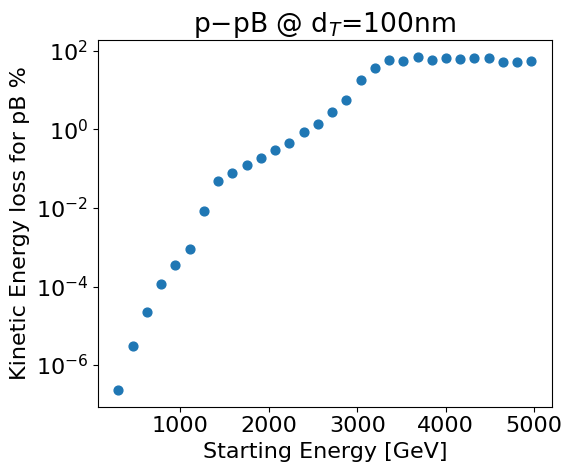

In [5]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
#ax.scatter(zs,delta_e_MeV,s=40)
ax.scatter(E_MeV_drv/1000,np.abs(fracs_E_driver-1)*100,s=40,label="pB")
#ax.scatter(E_MeV/1000,np.abs(fracs_E_rider-1)*100,s=40,label="p")
#ax.scatter(zs_drv,np.abs(delta_e_MeV_drv/1000),s=40)  #for log plotting
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Kinetic Energy loss for pB %")
ax.set_xlabel(r"Starting Energy [GeV]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-0.54,0.01)
#plt.ylim(1E-5,5e3)
#plt.xscale('log')
plt.yscale('log')
plt.title("p$-$pB @ d$_T$=100nm")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()

In [6]:
fracs_E_driver

array([0.44009179, 0.46790204, 0.47797575, 0.32986974, 0.34370505,
       0.38741943, 0.34870124, 0.39993181, 0.30243472, 0.43868294,
       0.41995358, 0.64091735, 0.82122173, 0.94408873, 0.97164428,
       0.9859816 , 0.99121092, 0.9955235 , 0.99705038, 0.99815862,
       0.99878352, 0.99923068, 0.99952197, 0.99991588, 0.99999071,
       0.99999652, 0.99999882, 0.99999978, 0.99999997, 1.        ])

In [7]:
fracs_E_rider

array([0.99418485, 0.99157901, 0.9895728 , 0.97458116, 0.97721921,
       0.98181173, 0.97893286, 0.96360133, 0.9374157 , 0.94334282,
       0.95192274, 0.97068104, 0.98318446, 0.99494424, 0.9972192 ,
       0.9986161 , 0.99770891, 0.98691807, 0.99200236, 0.99932146,
       0.99976612, 0.99982712, 0.99991815, 0.99999656, 0.99999984,
       0.99999968, 0.99999998, 1.        , 1.        , 0.99999997])

In [8]:
np.append(max_dE_MeVs_driver,1)

NameError: name 'max_dE_MeVs_driver' is not defined

In [ ]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,delta_e_MeV/1000,s=40)
#ax.scatter(zs_drv,delta_e_MeV_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"$\Delta$ E [GeV]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(starting_distance_rider/2,3)
#plt.ylim(1E-2,2e3)
#plt.xscale('log')  #log scale works at 1mm range
#plt.yscale('log')
plt.title("Rider")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
#ax.scatter(zs,delta_e_MeV,s=40)
ax.scatter(zs_drv,delta_e_MeV_drv/1000,s=40)
#ax.scatter(zs_drv,np.abs(delta_e_MeV_drv/1000),s=40)  #for log plotting
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"$\Delta$ E [GeV]")
#ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-0.54,0.01)
#plt.ylim(1E-5,5e3)
#plt.xscale('log')
#plt.yscale('log')
plt.title("Driver")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()



In [ ]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
#ax.scatter(zs,delta_e_MeV,s=40)
ax.scatter(zs_drv,delta_e_MeV_drv/1000,s=40)
#ax.scatter(zs_drv,np.abs(delta_e_MeV_drv/1000),s=40)  #for log plotting
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"$\Delta$ E [GeV]")
#ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-0.54,0.01)
#plt.ylim(1E-5,5e3)
#plt.xscale('log')
#plt.yscale('log')
plt.title("Driver")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()



In [ ]:
10/3000*100

In [ ]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,delta_e_MeV/1000,s=40)
#ax.scatter(zs_drv,delta_e_MeV_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"$\Delta$ E [GeV]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(starting_distance_rider/2,3)
#plt.ylim(1E-2,2e3)
#plt.xscale('log')  #log scale works at 1mm range
#plt.yscale('log')
plt.title("Rider")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
#ax.scatter(zs,delta_e_MeV,s=40)
ax.scatter(zs_drv,delta_e_MeV_drv/1000,s=40)
#ax.scatter(zs_drv,np.abs(delta_e_MeV_drv/1000),s=40)  #for log plotting
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"$\Delta$ E [GeV]")
#ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-0.54,0.01)
#plt.ylim(1E-5,5e3)
#plt.xscale('log')
#plt.yscale('log')
plt.title("Driver")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()



In [ ]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,Pzs,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pz")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,Pzs_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pz")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,zs,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"zs")
ax.set_xlabel(r"zs_drv [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.ylim(2E-2,5)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()

### Various other plots

In [ ]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,Pts,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pt")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,Pts_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pt_drv")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,Pys,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pys")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,Pys_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pys_drv")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,Pxs,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pxs")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,Pxs_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pxs_drv")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,gammas,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"gammas [mm]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,gammas_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"gammas_drvs [mm]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,bzs,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"bzs [mm]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,np.abs(bzs_drv),s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"|bzs_drvs| [mm]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()